## Ernie Sumoso - ID: 881591
## Lab 8 - Social Media Analytics
### Collect Tweets with Geolocation Data and Show in Map

In [1]:
import requests
import bs4
import random

In [2]:
province_coords = {
  'Alberta': [51.024916, -114.086471],
  'British Columbia': [	49.232279, -122.961437],
  'Gta': [43.644248, -79.388159],
  'Manitoba': [56.415211, -98.739075],
  'New Brunswick': [45.280878, -66.069918],
  'Newfoundland and Labrador': [53.135509, -57.660435],
  'Nova Scotia': [44.657235, -63.601339],
  'Northwest Territories': [65.000000, -118.000000],
  'Nunavut': [65.037772, -92.554079],
  'Ontario': [47.512347, -79.682648],
  'Prince Edward Island':[46.250000, -63.000000],
  'Quebec': [46.845104, -71.255919],
  'Saskatchewan':[55.000000, -106.000000],
  'Yukon': [63.000147, -136.002501]
}

In [3]:
# Collecting Canada News Data
URL = r"https://www.thestar.com/news/canada/"
r = requests.get(url=URL)
soup = bs4.BeautifulSoup(r.content)

# Extracting locations
table_locations = soup.findAll('span', attrs = {'class':'tnt-flag label label-flag-section'}) 
tags_locations = [tag.text.strip() for tag in table_locations]
print(f"Found {len(tags_locations)} locations.")

# Extracting headlines
table_headlines = soup.findAll('h3', attrs = {'class':'tnt-headline'})
tags_headlines = [tag.text.strip() for tag in table_headlines]
print(f"Found {len(tags_headlines)} headlines.")

Found 49 locations.
Found 49 headlines.


In [4]:
# Filter news for only with location specified
news = []
for tags in zip(tags_locations, tags_headlines):
    if tags[0] in province_coords:
        news.append(tags)
print(f"Found {len(news)} news with location within Canada.")

Found 31 news with location within Canada.


In [5]:
import folium as f

# Plot World Map using folium
fmap = f.Map([50.35, -90.6972], zoom_start=4)

for i, new in enumerate(news):
    coords = province_coords[new[0]]
    new_coords = [coords[0] - random.uniform(-0.5, 0.5), coords[1] - random.uniform(-0.5, 0.5)]
    f.Marker(
        location= new_coords,
        tooltip="Province: " + new[0] + " - News #" + str(i) + " - Click to read news",
        popup="News Headline: " + new[1],
        icon=f.Icon(icon="book"),
    ).add_to(fmap)

fmap

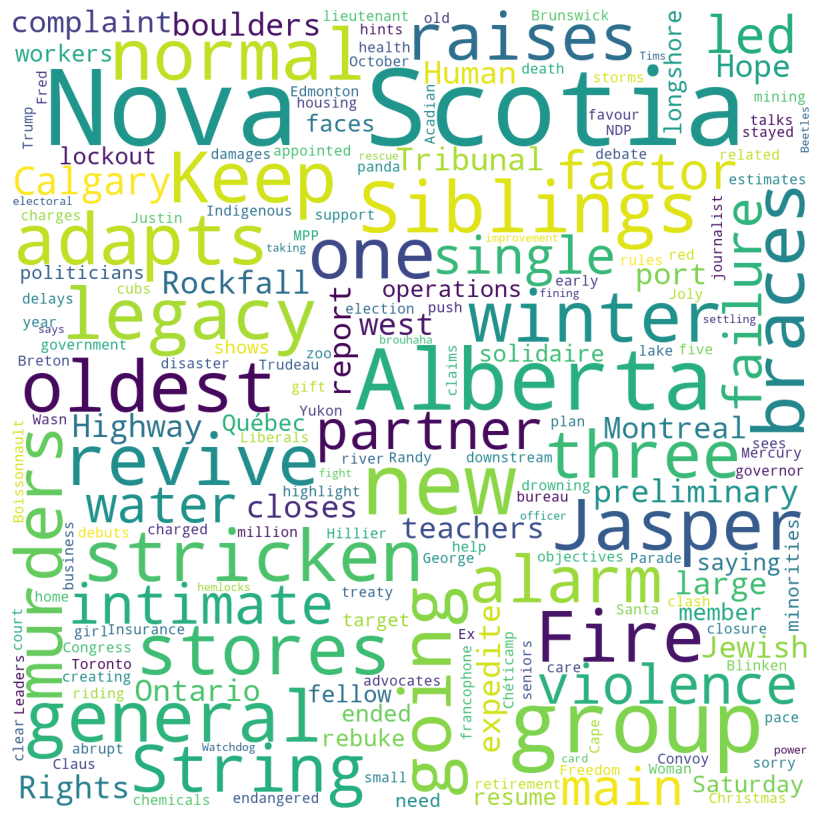

In [6]:
import wordcloud as wc
import matplotlib.pyplot as plt
import string

# Define the entire text and stopwords (from wordcloud and single char words)
all_text = " ".join([new[1] for new in news])
stopwords = wc.STOPWORDS.union(set(string.ascii_lowercase))

# Set the wordcloud using the defined parameters
wordcloud = wc.WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_text)
 
# Plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()